Contributers: Arda Can Baysar
    

## World Progress

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

### Logistics

**Deadline.** This project is due at 11:59pm on Thursday May 24.  Late submissions will be accepted, but a 10% late penalty will be applied for each day late. 

**Partners.** You may work with one other partner. Only one of you is required to submit the project. Yu shoudl include thenames of contributers on the project. 

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

To get started, load `datascience`, `numpy`, and `plots`.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Global Population Growth


The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 ![pew_population_projection.png](attachment:pew_population_projection.png) 
</a>

In this section, we will examine some of the factors that influence population growth and how they are changing around the world.

The first table we will consider is the total population of each country over time. Run the cell below.

In [2]:
# The population.csv file can also be found online here:
# https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv
# The version in this project was downloaded in February, 2017.
population = Table.read_table('population.csv')
population.show(3)

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286


### Bangladesh

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Inspect the standard to find the 3-letter code for Bangladesh.

In [29]:
years_array= population.where("geo","bgd").where("time", are.between_or_equal_to(1970,2015))
years_array

geo,time,population_total
bgd,1970,65048701
bgd,1971,66417450
bgd,1972,67578486
bgd,1973,68658472
bgd,1974,69837960
bgd,1975,71247153
bgd,1976,72930206
bgd,1977,74848466
bgd,1978,76948378
bgd,1979,79141947


**Question 1.** Create a table called `b_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1970 through 2015 (including both 1970 and 2015) and the second should contain the population of Bangladesh in each of those years.

In [31]:
years_array= population.where("geo","bgd").where("time", are.between_or_equal_to(1970,2015)).column(1)
years_array

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015])

In [32]:
population_array=population.where("geo","bgd").where("time", are.between_or_equal_to(1970,2015)).column(2)
population_array

array([ 65048701,  66417450,  67578486,  68658472,  69837960,  71247153,
        72930206,  74848466,  76948378,  79141947,  81364176,  83599582,
        85868228,  88181211,  90559540,  93015182,  95550798,  98149262,
       100779551, 103400571, 105983136, 108509679, 110987459, 113442354,
       115913710, 118427768, 120987124, 123574107, 126169583, 128746273,
       131280739, 133776064, 136228456, 138600174, 140843786, 142929979,
       144839238, 146592687, 148252473, 149905836, 151616777, 153405612,
       155257387, 157157394, 159077513, 160995642])

In [33]:
b_pop = Table().with_columns("time", years_array,"population_total", population_array)
b_pop

time,population_total
1970,65048701
1971,66417450
1972,67578486
1973,68658472
1974,69837960
1975,71247153
1976,72930206
1977,74848466
1978,76948378
1979,79141947


Run the following cell to create a table called `b_five` that has the population of Bangladesh every five years. At a glance, it appears that the population of Bangladesh has been growing quickly indeed!

In [34]:
b_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1970, 2016, 5) # 1970, 1975, 1980, ...
b_five = b_pop.sort('time').where('time', are.contained_in(fives))
b_five

time,population_total
1970,"65,048,701"
1975,"71,247,153"
1980,"81,364,176"
1985,"93,015,182"
1990,"105,983,136"
1995,"118,427,768"
2000,"131,280,739"
2005,"142,929,979"
2010,"151,616,777"
2015,"160,995,642"


**Question 2.** Create a table called `b_five_growth` that includes three columns, `time`, `population_total`, and `annual_growth`. There should be one row for every five years from 1970 through 2010 (but not 2015). The first two columns are the same as `b_five`. The third column is the **annual** growth rate for each five-year period. For example, the annual growth rate for 1975 is the yearly exponential growth rate that describes the total growth from 1975 to 1980 when applied 5 times.

*Hint*: Only your `b_five_growth` table will be scored for correctness; the other names are suggestions that you are welcome to use, change, or delete.

In [ ]:
## General Growth Formula: A = P(1 + r)^t >> r= [(A/P)^(1/t)]-1
# A = Amount after growth
# P = Original amount
# r = yearly growth rate (expressed as a decimal)
# t = years

#initial array [1970, 2010] arası olcak
#changed array [1975, 2015] arası olcak

# [(changed/initial)^(1/5)]-1 population arrayine uygula

In [72]:
initial_test=b_five.take(np.arange(0,9))
initial_test

time,population_total
1970,"65,048,701"
1975,"71,247,153"
1980,"81,364,176"
1985,"93,015,182"
1990,"105,983,136"
1995,"118,427,768"
2000,"131,280,739"
2005,"142,929,979"
2010,"151,616,777"


In [73]:
changed_test=b_five.take(np.arange(1,10))
changed_test

time,population_total
1975,"71,247,153"
1980,"81,364,176"
1985,"93,015,182"
1990,"105,983,136"
1995,"118,427,768"
2000,"131,280,739"
2005,"142,929,979"
2010,"151,616,777"
2015,"160,995,642"


In [76]:
initial_pop = initial_test.column(1)
changed_pop = changed_test.column(1)
growth_array=((changed_pop/initial_pop)**(1/5))-1
growth_array

array([0.01837042, 0.0269118 , 0.02712694, 0.02644713, 0.022453  ,
       0.02082076, 0.01714874, 0.01187015, 0.01207657])

In [77]:
b_1970_through_2010 =b_five.take(np.arange(0,9))
initial = initial_test.column(1)
changed = changed_test.column(1)
growth_array=((changed/initial)**(1/5))-1
b_five_growth = b_1970_through_2010.with_column("annual_growth", growth_array)
b_five_growth.set_format('annual_growth', PercentFormatter)
b_five_growth


time,population_total,annual_growth
1970,"65,048,701",1.84%
1975,"71,247,153",2.69%
1980,"81,364,176",2.71%
1985,"93,015,182",2.64%
1990,"105,983,136",2.25%
1995,"118,427,768",2.08%
2000,"131,280,739",1.71%
2005,"142,929,979",1.19%
2010,"151,616,777",1.21%


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [97]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('fertility.csv')

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

In [79]:
life_expectancy

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19
afg,1803,28.18
afg,1804,28.17
afg,1805,28.16
afg,1806,28.15
afg,1807,28.14
afg,1808,28.13
afg,1809,28.12


**Question 3.** Perhaps population is growing more slowly because people aren't living as long. Use the `life_expectancy` table to draw a line graph with the years 1970 and later on the horizontal axis that shows how the *life expectancy at birth* has changed in Bangladesh.

In [83]:
test=life_expectancy.where("geo", "bgd").where("time", are.above_or_equal_to(1970))
test

geo,time,life_expectancy_years
bgd,1970,46.31
bgd,1971,45.74
bgd,1972,45.52
bgd,1973,45.77
bgd,1974,46.49
bgd,1975,47.58
bgd,1976,48.92
bgd,1977,50.27
bgd,1978,51.47
bgd,1979,52.44


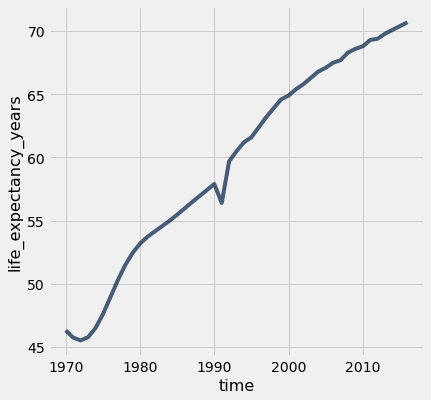

In [95]:
test.plot(1,2)

**Question 4.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not? What happened in Bangladesh in 1991, and does that event explain the change in population growth rate?

It doesnt help directly explain the population growth rate decreased from 1985 to 2010 in Bangladesh. Because graph above is just life expactancy according to years, it doesnt tell us exact information about population growth rate. Maybe we can infer that when the life expectancy increases, the longer people live, the later and the less they start having children but it would be a bit of a forced inference.
In 1991, a devastating cyclone hit the Bangladesh, killing more than 135,000 people and causing more than 1.5 billion dollars in damage thats why in the graph there is a huge gap in 1991. probably in 1991 life conditions became very bad so that life expectancy decreased dramatically.

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

**Question 5.** Write a function `fertility_over_time` that takes the Alpha-3 code of a `country` and a `start` year. It returns a two-column table with labels "`Year`" and "`Children per woman`" that can be used to generate a line chart of the country's fertility rate each year, starting at the `start` year. The plot should include the `start` year and all later years that appear in the `fertility` table. 

Then, in the next cell, call your `fertility_over_time` function on the Alpha-3 code for Bangladesh and the year 1970 in order to plot how Bangladesh's fertility rate has changed since 1970. **The expression that draws the line plot is provided for you; please don't change it.**

In [98]:
fertility

geo,time,children_per_woman_total_fertility
afg,1800,7
afg,1801,7
afg,1802,7
afg,1803,7
afg,1804,7
afg,1805,7
afg,1806,7
afg,1807,7
afg,1808,7
afg,1809,7


In [132]:
filter_Test=fertility.where("geo","bgd").where("time",are.above_or_equal_to(1970)).select(1,2)
filter_Test

time,children_per_woman_total_fertility
1970,6.95
1971,6.94
1972,6.93
1973,6.9
1974,6.87
1975,6.82
1976,6.76
1977,6.68
1978,6.59
1979,6.48


In [157]:
def fertility_over_time(country, start):
    time_array=fertility.where("geo",'bgd').where("time",are.above_or_equal_to(start)).column(1)
    fertility_array=fertility.where("geo",'bgd').where("time",are.above_or_equal_to(start)).column(2)
    new_table=Table().with_columns("Year", time_array, "Children per woman", fertility_array)
    return new_table

    
    
    

In [159]:
fertility_over_time("bgd",1970)

Year,Children per woman
1970,6.95
1971,6.94
1972,6.93
1973,6.9
1974,6.87
1975,6.82
1976,6.76
1977,6.68
1978,6.59
1979,6.48


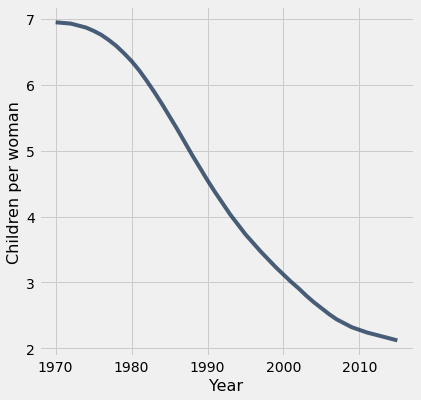

In [160]:
bangladesh_code = "bgd"
fertility_over_time(bangladesh_code, 1970).plot(0, 1) # You should *not* change this line.

**Question 6.** Does the graph above help directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh? Why or why not?

This graph helps directly explain why the population growth rate decreased from 1985 to 2010 in Bangladesh because growth rate is directly related to birth rate. When we look at the graph in 2010s woman are more likely to give less birth than the past thats why growth rate decreased year by year.

It has been observed that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

**Question 7.** Using both the `fertility` and `child_mortality` tables, draw a scatter diagram with one point for each year, starting with 1970, that has Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis. 

**The expression that draws the scatter diagram is provided for you; please don't change it.** Instead, create a table called `fertility_and_child_mortality` with the appropriate column labels and data in order to generate the chart correctly. Use the label "`Children per woman`" to describe total fertility and the label "`Child deaths per 1000 born`" to describe child mortality.

In [161]:
child_mortality

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.6
afg,1801,468.6
afg,1802,468.6
afg,1803,468.6
afg,1804,468.6
afg,1805,468.6
afg,1806,470
afg,1807,470
afg,1808,470
afg,1809,470


In [167]:
x_axis_array=fertility.where("time", are.above_or_equal_to(1970)).where("geo","bgd").column(2)
x_axis_array

array([6.95, 6.94, 6.93, 6.9 , 6.87, 6.82, 6.76, 6.68, 6.59, 6.48, 6.36,
       6.22, 6.06, 5.89, 5.71, 5.52, 5.33, 5.13, 4.93, 4.74, 4.55, 4.37,
       4.2 , 4.03, 3.88, 3.73, 3.6 , 3.47, 3.35, 3.23, 3.12, 3.01, 2.91,
       2.8 , 2.7 , 2.61, 2.52, 2.44, 2.38, 2.32, 2.28, 2.24, 2.21, 2.18,
       2.15, 2.12])

In [168]:
y_axis_array=child_mortality.where("time",are.above_or_equal_to(1970)).where("geo", "bgd").column(2)
y_axis_array


array([224.1, 223. , 222. , 220.7, 219.1, 217.1, 214.5, 211.2, 207.4,
       203.3, 198.9, 194.2, 189.4, 184.4, 179.1, 173.5, 167.7, 161.8,
       155.8, 149.7, 143.7, 137.7, 131.7, 125.8, 119.9, 114.2, 108.6,
       103.2,  97.9,  92.8,  88. ,  83.5,  79. ,  74.8,  70.7,  66.8,
        63. ,  59.4,  55.9,  52.6,  49.6,  46.7,  44. ,  41.6,  39.5,
        37.6])

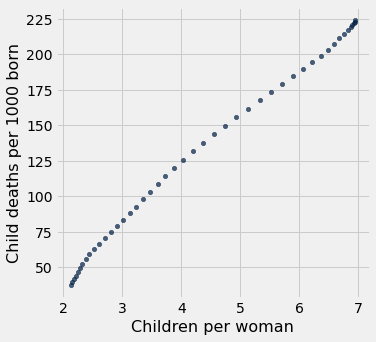

In [171]:
fertility_and_child_mortality = Table().with_columns("Children per woman", x_axis_array,"Child deaths per 1000 born",y_axis_array)
fertility_and_child_mortality.scatter('Children per woman', 'Child deaths per 1000 born') # You should *not* change this line.

**Question 8.** In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality causes parents to choose to have fewer children?

The countries where child deaths are low are more likely to be developed and this accompanies with higher education levels, access to birth control, a secure social safety etc. because of these they tend to have less children than people in bad life conditions.
another point of view is if people know their child deaths rate are very high they may be more likely to give more birth, which means that their child are more likely to die, they may think of giving second or third birth.
or vice versa if child deaths rate is very low people can think that their children will leave longer and no need for second one.

### The World

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Run the cell below to generate two overlaid histograms, one for 1960 and one for 2010, that show the distributions of total fertility rates for these two years among all 201 countries in the `fertility` table.

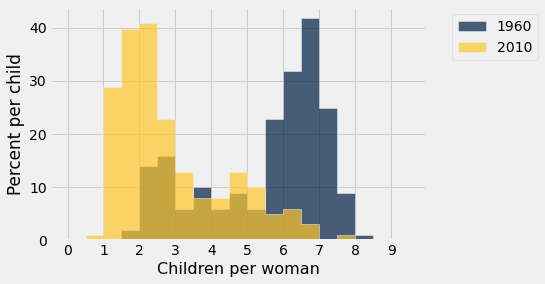

In [173]:
Table().with_columns(
    '1960', fertility.where('time', 1960).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child')
_ = plots.xlabel('Children per woman')
_ = plots.xticks(np.arange(10))

**Question 9.** Assign `fertility_statements` to a list of the numbers for each statement below that can be correctly inferred from these histograms.
1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1960 and 2010.
1. In 2010, about 40% of countries had a fertility rate between 1.5 and 2.
1. In 1960, less than 20% of countries had a fertility rate below 3.
1. More countries had a fertility rate above 3 in 1960 than in 2010.
1. At least half of countries had a fertility rate between 5 and 8 in 1960.
1. At least half of countries had a fertility rate below 3 in 2010.

In [421]:
#1. soru
(10+6)*0.5=8%
(8+8)*0.5=8%
#2.soru
40*0.5=20%
#3. soru 
(1+13+15)*0.5=%15 
#5. soru
(5+24+32+42+9)*0.5=56%
#6.soru
(1+28+39+42+24)*0.5=67%


14.5

In [422]:
fertility_statements = [1,3,4,5,6]

**Question 10.** Draw a line plot of the world population from 1800 through 2005. The world population is the sum of all the country's populations. 

In [184]:
population.sort(1)

geo,time,population_total
gbr,1086,2449441
gbr,1087,2463492
gbr,1088,2477625
gbr,1089,2491838
gbr,1090,2506133
gbr,1091,2520510
gbr,1092,2534969
gbr,1093,2549511
gbr,1094,2564137
gbr,1095,2578847


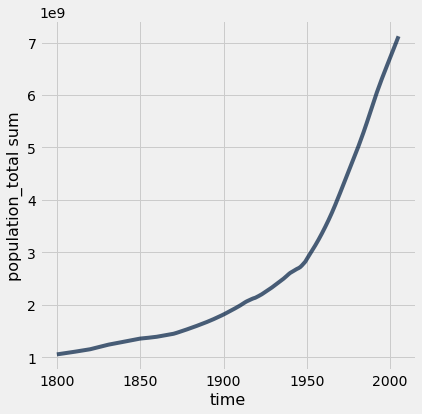

In [201]:
test=population.select(1,2).where("time",are.between_or_equal_to(1800,2005)).group("time",sum)
test.set_format(1, NumberFormatter)
test.plot(0,1)

**Question 11.** Create a function `stats_for_year` that takes a `year` and returns a table of statistics. The table it returns should have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row should contain one Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility` and `child_mortality` tables. Only include rows for which all three statistics are available for the country and year.

In addition, restrict the result to country codes that appears in `big_50`, an array of the 50 most populous countries in 2010. This restriction will speed up computations later in the project.

*Hint*: The tests for this question are quite comprehensive, so if you pass the tests, your function is probably correct. However, without calling your function yourself and looking at the output, it will be very difficult to understand any problems you have, so try your best to write the function correctly and check that it works before you rely on the `ok` tests to confirm your work.

In [204]:
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column("geo")
big_50

array(['chn', 'ind', 'usa', 'idn', 'bra', 'pak', 'nga', 'bgd', 'rus',
       'jpn', 'mex', 'phl', 'vnm', 'eth', 'egy', 'deu', 'irn', 'tur',
       'tha', 'cod', 'fra', 'gbr', 'ita', 'mmr', 'zaf', 'kor', 'esp',
       'col', 'tza', 'ukr', 'arg', 'ken', 'pol', 'sdn', 'dza', 'can',
       'uga', 'mar', 'irq', 'per', 'ven', 'mys', 'sau', 'afg', 'uzb',
       'npl', 'prk', 'moz', 'gha', 'yem'], dtype='<U11')

In [205]:
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))
population_of_big_50

geo,time,population_total
afg,1960,8994793
afg,1961,9164945
afg,1962,9343772
afg,1963,9531555
afg,1964,9728645
afg,1965,9935358
afg,1966,10148841
afg,1967,10368600
afg,1968,10599790
afg,1969,10849510


In [236]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', year).drop('time') ##zaten yıla göre baktığımız için row sayıları aynı olcak
    f = fertility.where('time', year).drop('time')
    c = child_mortality.where('time', year).drop('time')
    stats_table=p.join("geo",f,"geo").join("geo",c,"geo")
    return stats_table

In [237]:
stats_for_year(2010)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,27962207,5.66,105
arg,41222875,2.22,14.6
bgd,151616777,2.28,49.6
bra,198614208,1.84,16.7
can,34126173,1.63,5.6
chn,1340968737,1.54,15.7
cod,65938712,6.25,116.1
col,45918101,2.38,18.5
deu,80435307,1.39,4.2
dza,36036159,2.82,27.4


**Question 12.** Create a table called `pop_by_decade` with two columns called `decade` and `population`. It has a row for each `year` since 1960 that starts a decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. For example, 1960 is the first year of the 1960's decade. You should see that these countries contain most of the world's population.

*Hint:* One approach is to define a function `pop_for_year` that computes this total population, then `apply` it to the `decade` column. 

In [240]:
decades = Table().with_column('decade', np.arange(1960, 2011, 10))
decades

decade
1960
1970
1980
1990
2000
2010


In [243]:
decades = Table().with_column('decade', np.arange(1960, 2011, 10))

def pop_for_year(year):
    return stats_for_year(year).column("population_total").sum() #stats for yeardaki o yıldaki bütün populationları topla

pop_by_decade = decades.with_column("population",decades.apply(pop_for_year,"decade")) #decade e bakıp population hesaplıycak yeni columna ekliycek
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,624,944,597"
1970,"3,211,487,418"
1980,"3,880,722,003"
1990,"4,648,434,558"
2000,"5,367,553,063"
2010,"6,040,810,517"


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [245]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
alb,Albania,europe_central_asia
dza,Algeria,middle_east_north_africa
asm,American Samoa,east_asia_pacific
and,Andorra,europe_central_asia
ago,Angola,sub_saharan_africa
aia,Anguilla,america
atg,Antigua and Barbuda,america
arg,Argentina,america


In [246]:
stats_for_year(1960) #bunların hangi regionlara ait olduğunu bulup region karşısına count edicez

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,8994793,7.67,362.4
arg,20619075,3.11,73.2
bgd,48200702,6.73,264.3
bra,72493585,6.21,171.8
can,17909232,3.91,32.6
chn,644450173,3.99,309
cod,15248246,6,266
col,16480384,6.81,127.3
deu,73179665,2.41,42.87
dza,11124892,7.65,245.7


**Question 13.** Create a table called `region_counts` that has two columns, `region` and `count`. It should describe the count of how many countries in each region appear in the result of `stats_for_year(1960)`. For example, one row would have `south_asia` as its `world_6region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 1960.

In [258]:
region_50 = countries.select('country', 'world_6region').where("country", are.contained_in(big_50))
region_counts=region_50.group(1)
region_counts

world_6region,count
america,8
east_asia_pacific,10
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,10


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell. Do you think you can identify any of the dots?

/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:3405: FutureWarning: scatter(colors=x) has been removed. Use scatter(group=x)
  warnings.warn("scatter(colors=x) has been removed. Use scatter(group=x)", FutureWarning)


AttributeError: 'PathCollection' object has no property 'colors'

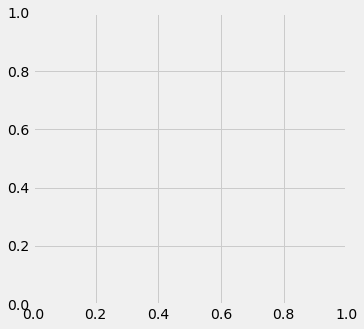

In [423]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertilty_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)

fertilty_vs_child_mortality(1960)

**Question 14.** Assign `scatter_statements` to a list of the numbers for each statement below that can be inferred from this scatter diagram for 1960. 
1. The `europe_central_asia` region had the lowest child mortality rate.
1. The lowest child mortality rate of any country was from an `east_asian_pacific` country.
1. Most countries had a fertility rate above 5.
1. There was an association between child mortality and fertility.
1. The two largest countries by population also had the two highest child mortality rate.

In [425]:
scatter_statements = [1,3,4]
#Kod hata verdiği için, sizin mailde attığınız scatter diagrama göre cevapladım.

The result of the cell below is interactive. Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between so-called "Western" and "developing" countries that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


interactive(children=(IntSlider(value=1960, description='year', max=2015, min=1960), Output()), _dom_classes=(…

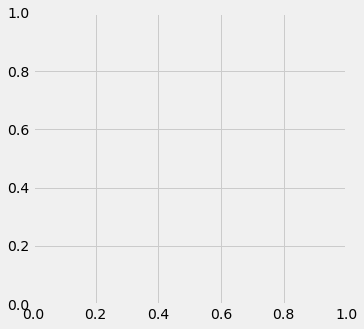

In [424]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
Table().with_column('Year', np.arange(1960, 2016)).apply(stats_relabeled, 'Year')

_ = widgets.interact(fertilty_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

Now is a great time to take a break and watch the same data presented by [Hans Rosling in a 2010 TEDx talk](https://www.gapminder.org/videos/reducing-child-mortality-a-moral-and-environmental-imperative) with smoother animation and witty commentary.

## 2. Global Poverty


In 1800, 85% of the world's 1 billion people lived in *extreme poverty*, defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education and information." A common measure of extreme poverty is a person living on less than \$1.25 per day.

In 2015, the proportion of people living in extreme poverty was estimated to be 12%. Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still close to 1 billion. The United Nations recently adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."
In this section, we will examine extreme poverty trends around the world.

First, load the population and poverty rate by country and year and the country descriptions. While the `population` table has values for every recent year for many countries, the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

In [262]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


In [290]:
poverty.show()

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53
alb,2005,0.44
alb,2008,0.2
alb,2012,0.46
dza,1988,7.1
dza,1995,6.38
ago,2000,54.31
ago,2009,43.37


**Question 1.** Assign `latest` to a three-column table with one row for each country that appears in the `poverty` table. The first column should contain the 3-letter code for the country. The second column should contain the *most recent year* for which an extreme poverty rate is available for the country. The third column should contain the poverty rate in that year. **Do not change the last line, so that the labels of your table are set correctly.**

*Hint*: the `first` function may be helpful, but you are not required to use it.

In [291]:
time_max=poverty.group(0,max)
time_max

geo,time max,extreme_poverty_percent_people_below_125_a_day max
ago,2009,54.31
alb,2012,0.73
arg,2011,12.58
arm,2012,18.83
aus,2003,1.36
aut,2004,1
aze,2008,25.23
bdi,2006,86.43
bel,2000,0.83
ben,2012,51.61


In [282]:
def percent_finder(geo,time):
    percent=poverty.where("geo",geo).where("time",time).column(2).item(0)
    return percent

    
percent_finder("ago",2009) # bu fonksiyonu time_max e apply yap, çift parametreli apply test et ?



43.37

In [287]:
latest=time_max.drop(2).with_column("poverty percent", time_max.apply(percent_finder,"geo","time max"))
latest=latest.relabel(0, 'geo').relabel(1, 'time').relabel(2, 'poverty_percent')
latest


geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


In [285]:
def first(values):
    return values.item(0)

latest = ...

latest.relabel(0, 'geo').relabel(1, 'time').relabel(2, 'poverty_percent') # You should *not* change this line.

AttributeError: 'ellipsis' object has no attribute 'relabel'

**Question 2.** Using both `latest` and `population`, create a four-column table called `recent` with one row for each country in `latest`. The four columns should have the following labels and contents:
1. `geo` contains the 3-letter country code,
1. `poverty_percent` contains the most recent poverty percent,
1. `population_total` contains the population of the country in 2010,
1. `poverty_total` contains the number of people in poverty **rounded to the nearest integer**, based on the 2010 population and most recent poverty rate.

In [298]:
pop_2010=population.where("time",2010).drop(1)
pop_2010

geo,population_total
abw,101597
afg,27962207
ago,21219954
aia,15358
ala,26923
alb,2901883
and,84864
ant,200689
are,8329453
arg,41222875


In [306]:
recent=latest.select(0,2).join("geo", pop_2010, "geo")
poverty_total_array=recent.column(1)/100*recent.column(2)
recent=recent.with_column("poverty_total", poverty_total_array)
recent

geo,poverty_percent,population_total,poverty_total
ago,43.37,21219954,9.20309e+06
alb,0.46,2901883,13348.7
arg,1.41,41222875,581243
arm,1.75,2963496,51861.2
aus,1.36,22162863,301415
aut,0.34,8391986,28532.8
aze,0.31,9099893,28209.7
bdi,81.32,9461117,7.69378e+06
bel,0.5,10929978,54649.9
ben,51.61,9509798,4.90801e+06


In [25]:
poverty_and_pop = ...
recent = ...
recent

**Question 3.** Assuming that the `poverty_total` numbers in the `recent` table describe *all* people in 2010 living in extreme poverty, assign the name `poverty_percent` to the percentage of the world's 2010 population that were living in extreme poverty. You should find a number that is somewhat above the 2015 global estimate of 12%, since many country-specific poverty rates are older than 2015.

*Hint*: The sum of the `population_total` column in the `recent` table is not the world population, because only a subset of the world's countries have known poverty rates. Use the `population` table to compute the world's 2010 total population.

In [312]:
sum_pop=population.where(1,2010).column(2).sum()
sum_pop

6929757296

In [314]:
poverty_pop=recent.column("poverty_total").sum()
poverty_pop

990911654.7197

In [315]:
poverty_percent = poverty_pop/sum_pop
poverty_percent

0.1429937027219806

Although people live in extreme poverty throughout the world (with more than 5 million in the United States), the largest numbers are in Asia and Africa.

**Question 4.** Assign `largest` to a two-column table with the `name` (not the 3-letter code) and `poverty_total` of the 10 countries with the largest number of people living in extreme poverty.

In [329]:
poverty_10= recent.sort("poverty_total", descending=True).take(np.arange(10)).select(0,3)
poverty_10
poverty_10.set_format('poverty_total', NumberFormatter)

geo,poverty_total
ind,"290,881,638.30"
nga,"98,891,167.46"
chn,"83,944,642.94"
bgd,"65,574,256.05"
cod,"57,841,438.17"
idn,"39,141,326.41"
eth,"32,213,991.37"
pak,"21,663,595.15"
tza,"19,847,978.67"
mdg,"18,480,425.70"


In [357]:
geo_and_name=countries.select(0,2)
geo_and_name

country,name
afg,Afghanistan
akr_a_dhe,Akrotiri and Dhekelia
alb,Albania
dza,Algeria
asm,American Samoa
and,Andorra
ago,Angola
aia,Anguilla
atg,Antigua and Barbuda
arg,Argentina


In [336]:
joined=poverty_10.join("geo",geo_and_name,"country").sort("poverty_total",descending=True)
largest=joined.select(2,1)
largest

name,poverty_total
India,"290,881,638.30"
Nigeria,"98,891,167.46"
China,"83,944,642.94"
Bangladesh,"65,574,256.05"
"Congo, Dem. Rep.","57,841,438.17"
Indonesia,"39,141,326.41"
Ethiopia,"32,213,991.37"
Pakistan,"21,663,595.15"
Tanzania,"19,847,978.67"
Madagascar,"18,480,425.70"


**Question 5.** Write a function called `poverty_timeline` that takes the name of a country as its argument. It should draw a line plot of the number of people living in poverty in that country with time on the horizontal axis. The line plot should have a point for each row in the `poverty` table for that country. To compute the population living in poverty from a poverty percentage, multiply by the population of the country **in that year**.

*Hint*: The names within the `poverty_timeline` function correspond to our solution, but you don't need to use them. Any way that you want to draw the plot is fine, as long as it generates the correct graph.

In [405]:
population
#name, time, poverty_percent,population, poverty_total tablosu yap

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286
abw,1803,19286
abw,1804,19286
abw,1805,19286
abw,1806,19286
abw,1807,19286
abw,1808,19286
abw,1809,19286


In [391]:
def population_finder(geo,time):
    pop=population.where("geo",geo).where("time",time).column(2).item(0)
    return pop
    
test=population_finder("abw",1809)
test

19286

In [410]:
ptl=poverty.join("geo", geo_and_name, "country").select(0,3,1,2)
ptl=ptl.with_column("population", ptl.apply(population_finder,"geo","time"))
poverty_array=ptl.column(3)/100*ptl.column(4)
ptl=ptl.with_column("poverty",poverty_array)
ptl=ptl.select(1,2,"poverty")
ptl.set_format('poverty', NumberFormatter)
ptl





name,time,poverty
Angola,2000,"8,178,346.30"
Angola,2009,"8,899,568.67"
Albania,1996,"6,184.07"
Albania,2002,"22,798.72"
Albania,2004,"16,449.92"
Albania,2005,"13,561.56"
Albania,2008,"5,936.05"
Albania,2012,"13,251.07"
Argentina,1986,0.00
Argentina,1987,0.00


In [397]:
population

geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286
abw,1803,19286
abw,1804,19286
abw,1805,19286
abw,1806,19286
abw,1807,19286
abw,1808,19286
abw,1809,19286


In [396]:
poverty

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53
alb,2005,0.44
alb,2008,0.2
alb,2012,0.46
dza,1988,7.1
dza,1995,6.38
ago,2000,54.31
ago,2009,43.37


In [411]:
def poverty_timeline(country):
    ptl.where("name",country).select("time","poverty").plot(0,1)
    
    

In [415]:
ptl.where("name","Turkey")

name,time,poverty
Turkey,1987,"593,558.56"
Turkey,1994,"1,060,001.35"
Turkey,2002,"748,946.31"
Turkey,2003,"1,895,925.47"
Turkey,2004,"944,327.21"
Turkey,2005,"983,978.95"
Turkey,2006,"927,513.73"
Turkey,2007,"660,397.17"
Turkey,2008,"70,344.36"
Turkey,2009,"256,540.71"


Finally, draw the timelines below to see how the world is changing. You can check your work by comparing your graphs to the ones on [gapminder.org](https://goo.gl/lPujuh).

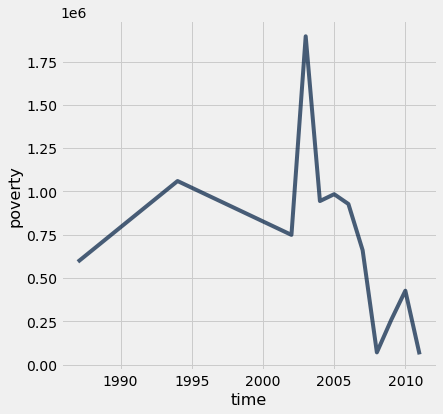

In [412]:
poverty_timeline('Turkey')

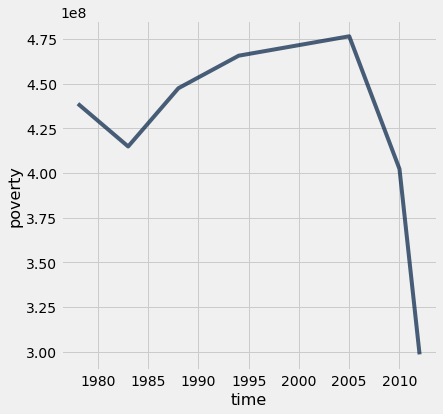

In [416]:
poverty_timeline('India')

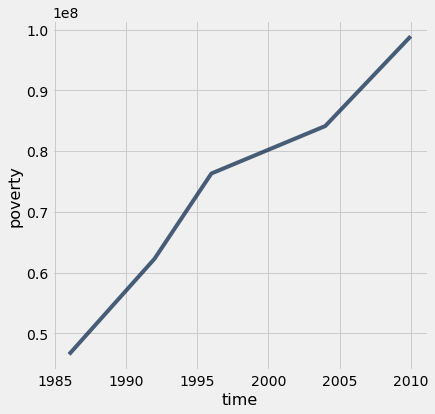

In [417]:
poverty_timeline('Nigeria')

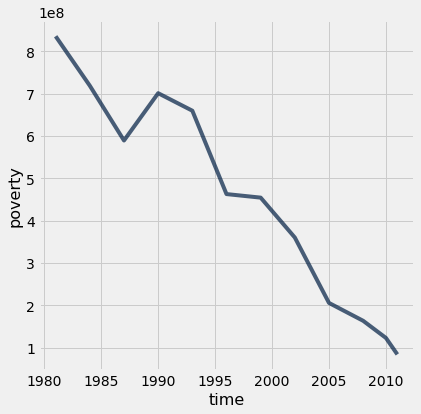

In [418]:
poverty_timeline('China')

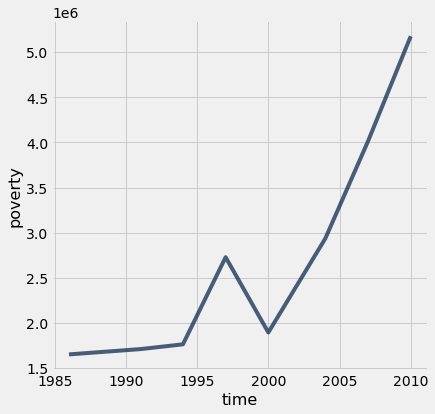

In [419]:
poverty_timeline('United States')

Although the number of people living in extreme poverty has been increasing in Nigeria and the United States, the massive decreases in China and India have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

To learn more, watch [Hans Rosling in a 2015 film](https://www.gapminder.org/videos/dont-panic-end-poverty/) about the UN goal of eradicating extreme poverty from the world.

**You're finished!** Congratulations on mastering data visualization and table manipulation. Time to submit. Don't forget to run all teh cells before submission!